# Датасет: Выбор еды и предпочтения студентов колледжа Мерсихерст (Mercyhurst University)
Этот набор данных включает информацию о выборе продуктов питания, предпочтениях и некоторых других факторов, которые могут влиять на пищевое поведение студентов колледжа Мерсихерст.
Изначальный датасет состоит из 60 пунктов(вопросов), по которым были оценены 126 студентов.
Данные не очищены, поэтому я выбрала 20 основных пунктов для своего анализа (ниже)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Ознакомимся с датасетом
students_food = pd.read_csv('food_coded.csv',sep=',')
students_food.head(5)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [5]:
#Проверим, что за данные и сколько в них отсутствующих значений, заодно выберем те пункты, что нас интересуют. 
students_food.isna().sum().head(60)

GPA                              2
Gender                           0
breakfast                        0
calories_chicken                 0
calories_day                    19
calories_scone                   1
coffee                           0
comfort_food                     1
comfort_food_reasons             1
comfort_food_reasons_coded      19
cook                             3
comfort_food_reasons_coded.1     0
cuisine                         17
diet_current                     1
diet_current_coded               0
drink                            2
eating_changes                   3
eating_changes_coded             0
eating_changes_coded1            0
eating_out                       0
employment                       9
ethnic_food                      0
exercise                        13
father_education                 1
father_profession                3
fav_cuisine                      2
fav_cuisine_coded                0
fav_food                         2
food_childhood      

In [6]:
#Поскольку некоторые инетресующие меня столбцы имеют непонятные данные - выведу их на экран и проанализирую.
#Далее постараюсь заменить те, что портят общую картину.
print('Уникальные значения GPA(средний бал):',list(students_food['GPA'].unique()))
print('Уникальные значения cook (готовка):',list(students_food['cook'].unique()))
print('Уникальные значения employment (работа):',list(students_food['employment'].unique()))
print('Уникальные значения exercise (тренировки каждый день):',list(students_food['exercise'].unique()))
print('Уникальные значения income (доход):',list(students_food['income'].unique()))
print('Уникальные значения marital_status (семейное положение):',list(students_food['marital_status'].unique()))
print('Уникальные значения on_off_campus (жизнь в кампусе или вне его пределов):',list(students_food['on_off_campus'].unique()))
print('Уникальные значения self_perception_weight (отношение к своему веесу):',list(students_food['self_perception_weight'].unique()))
print('Уникальные значения sports (спорт):',list(students_food['sports'].unique()))
print('Уникальные значения weight (вес):',list(students_food['weight'].unique()))


Уникальные значения GPA(средний бал): ['2.4', '3.654', '3.3', '3.2', '3.5', '2.25', '3.8', '3.904', '3.4', '3.6', '3.1', nan, '4', '2.2', '3.87', '3.7', '3.9', '2.8', '3', '3.65', '3.89', '2.9', '3.605', '3.83', '3.292', '3.35', 'Personal ', '2.6', '3.67', '3.73', '3.79 bitch', '2.71', '3.68', '3.75', '3.92', 'Unknown', '3.77', '3.63', '3.882']
Уникальные значения cook (готовка): [2.0, 3.0, 1.0, 5.0, 4.0, nan]
Уникальные значения employment (работа): [3.0, 2.0, 1.0, nan]
Уникальные значения exercise (тренировки каждый день): [1.0, 2.0, 3.0, nan]
Уникальные значения income (доход): [5.0, 4.0, 6.0, 1.0, 3.0, 2.0, nan]
Уникальные значения marital_status (семейное положение): [1.0, 2.0, 4.0, nan]
Уникальные значения on_off_campus (жизнь в кампусе или вне его пределов): [1.0, 2.0, 3.0, 4.0, nan]
Уникальные значения self_perception_weight (отношение к своему веесу): [3.0, 6.0, 5.0, 4.0, 1.0, 2.0, nan]
Уникальные значения sports (спорт): [1.0, 2.0, nan]
Уникальные значения weight (вес): ['187

In [7]:
#Отберем значения для na_value, чтобы немного "причесать" наш датасет и заодно облегчить дальнейшую аналитическую работу.
students_food = pd.read_csv('food_coded.csv',sep=',', na_values=['nan',"I'm not answering this. ",'Unknown','Personal ','3.79 bitch','Not sure, 240','144 lbs'])
students_food.head(20)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187.0
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155.0
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,NaN
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,NaN
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190.0
5,2.250,1,1,610,3.0,980.0,2,"Candy, brownies and soda.","None, i don't eat comfort food. I just eat whe...",4.0,...,1.0,2.0,4,940.0,345,None.,1,2,1315,190.0
6,3.800,2,1,610,3.0,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",1.0,...,1.0,1.0,5,940.0,690,soccer,4,1,1315,180.0
7,3.300,1,1,720,3.0,420.0,1,"Ice cream, cheeseburgers, chips.",I eat comfort food when im stressed out from s...,1.0,...,1.0,2.0,1,725.0,500,none,4,2,1315,137.0
8,3.300,1,1,430,NaN,420.0,1,"Donuts, ice cream, chips",Boredom,2.0,...,2.0,2.0,5,725.0,345,none,3,2,760,180.0
9,3.300,1,1,430,3.0,315.0,2,"Mac and cheese, chocolate, and pasta","Stress, anger and sadness",1.0,...,1.0,1.0,4,580.0,345,field hockey,5,1,900,125.0


Я выделила из датасета 20 наиболее интересных фактора оценки питания среди студентов, включая личные факторы, такие как: личная жизнь, проживание, примерный уровень дохода и наличие работы

#1 column: GPA Grade Point Average — это средний балл вашего аттестата или диплома.

#2 column: Gender (Пол) (1 – Женский and 2 – Мужской)

#3 column: cook – how often do you cook? (1 - Every day, 2 - A couple of times a week, 3 - Whenever I can, but that is not very often, 4 - I only help a little during holidays, 5 - Never, I really do not know my way around a kitchen)

#4 column: eating_out - frequency of eating out in a typical week (1 - Never, 2 - 1-2 times, 3 - 2-3 times, 4 - 3-5 times, 5 - every day)

#5 column: employment – do you work?(1 - yes full time, 2 - yes part time, 3 – no, 4  - other)

#6 column: exercise – how often do you exercise in a regular week? (1 - Everyday, 2 - Twice or three times per week, 3 - Once a week, 4 - Sometimes, 5 – Never)

#7 column: fav_cuisine_coded - (0-none, 1 – Italian/French/greek, 2 – Spanish/mexican, 3 – Arabic/Turkish, 4 – asian/chineses/thai/nepal, 5 – American, 6 – African, 7 – Jamaican, 8 – indian)

#8 column: fav_food - was your favorite food cooked at home or store bought? (1 - cooked at home, 2 - store bought, 3 - both bought at store and cooked at home)


#9 column: fruit_day - How likely to eat fruit in a regular day (1 - very unlikely, 2 - unlikely, 3 - neutral, 4 - likely, 5 - very likely)

#10	column: grade_level – (1 - freshman, 2 -Sophomore, 3 - Junior, 4 - Senior)

#11	column: income (1 - less than $15,000, 2 - $15,001 to $30,000, 3 - $30,001 to $50,000, 4 - $50,001 to $70,000, 5 - $70,001 to $100,000, 6 - higher than $100,000)

#12	column: marital_status (1 -Single, 2 - In a relationship, 3 - Cohabiting, 4 - Married, 5 - Divorced, 6 - Widowed)

#13	column: nutriti onal_check - checking nutritional values frequency (1 - never , 2 - on certain products only, 3 - very rarely, 4 - on most products, 5 - on everything)

#14	column: on_off_campus – living situation (1 - On campus, 2 - Rent out of campus, 3 - Live with my parents and commute, 4 - Own my own house)

#15	column: pay_meal_out - How much would you pay for meal out?  (1 - up to $5.00, 2 - $5.01 to $10.00, 3 - $10.01 to $20.00 , 4 - $20.01 to $30.00, 5 - $30.01 to $40.00, 6 - more than $40.01)

#16 column: self_perception_weight - self perception of weight (6 - i dont think myself in these terms, 5 - overweight , 4 - slightly overweight, 3 - just right, 2 - very fit, 1 - slim)

#17	column: sports - sports – do you do any sporting activity? (1 - Yes, 2 - No, 99 – no answer)

#18	column: veggies_day - How likely to eat veggies in a day?  (1 - very unlikely, 2 - unlikely, 3 - neutral, 4- likely, 5 - very likely)

#19	column: vitamins – do you take any supplements or vitamins? (1 – yes, 2 – no)

#20	column: weight – what is your weight in pounds? 




In [8]:
students_food_2 = students_food.filter(items=['GPA','Gender','cook','eating_out','employment','exercise','fav_cuisine_coded','fav_food','fruit_day','grade_level','income','marital_status','nutritional_check','on_off_campus','pay_meal_out','self_perception_weight','sports','veggies_day','vitamins','weight'])
students_food_2['Students'] = np.arange(len(students_food_2))
students_food_2.head(20)

,GPA,Gender,cook,eating_out,employment,exercise,fav_cuisine_coded,fav_food,fruit_day,grade_level,...,marital_status,nutritional_check,on_off_campus,pay_meal_out,self_perception_weight,sports,veggies_day,vitamins,weight,Students
0,2.400,2,2.0,3,3.0,1.0,3,1.0,5,2,...,1.0,5,1.0,2,3.0,1.0,5,1,187.0,0
1,3.654,1,3.0,2,2.0,1.0,1,1.0,4,4,...,2.0,4,1.0,4,3.0,1.0,4,2,155.0,1
2,3.300,1,1.0,2,3.0,2.0,1,3.0,5,3,...,2.0,4,2.0,3,6.0,2.0,5,1,NaN,2
3,3.200,1,2.0,2,3.0,3.0,3,1.0,4,4,...,2.0,2,1.0,2,5.0,2.0,3,1,NaN,3
4,3.500,1,1.0,2,2.0,1.0,1,3.0,4,4,...,1.0,3,1.0,4,4.0,1.0,4,2,190.0,4
5,2.250,1,3.0,1,3.0,2.0,6,3.0,2,2,...,2.0,1,1.0,5,5.0,2.0,1,2,190.0,5
6,3.800,2,2.0,2,3.0,1.0,4,1.0,4,4,...,1.0,4,2.0,2,4.0,1.0,4,1,180.0,6
7,3.300,1,3.0,2,2.0,2.0,5,1.0,5,2,...,1.0,4,1.0,5,3.0,2.0,4,2,137.0,7
8,3.300,1,3.0,5,2.0,NaN,1,3.0,4,1,...,2.0,2,1.0,3,4.0,2.0,3,2,180.0,8
9,3.300,1,3.0,3,3.0,1.0,1,1.0,5,1,...,2.0,5,1.0,3,3.0,1.0,5,1,125.0,9


In [9]:
students_food_2.isna().sum()

GPA                        5
Gender                     0
cook                       3
eating_out                 0
employment                 9
exercise                  13
fav_cuisine_coded          0
fav_food                   2
fruit_day                  0
grade_level                0
income                     1
marital_status             1
nutritional_check          0
on_off_campus              1
pay_meal_out               0
self_perception_weight     1
sports                     2
veggies_day                0
vitamins                   0
weight                     5
Students                   0
dtype: int64

In [10]:
#Визуализирую еще раз все NaN значения, где они есть:
print('Уникальные значения GPA(средний бал):',list(students_food_2['GPA'].unique()))
print('Уникальные значения cook (готовка):',list(students_food_2['cook'].unique()))
print('Уникальные значения employment (работа):',list(students_food_2['employment'].unique()))
print('Уникальные значения exercise (тренировки каждый день):',list(students_food_2['exercise'].unique()))
print('Уникальные значения income (доход):',list(students_food_2['income'].unique()))
print('Уникальные значения marital_status (семейное положение):',list(students_food_2['marital_status'].unique()))
print('Уникальные значения on_off_campus (жизнь в кампусе или вне его пределов):',list(students_food_2['on_off_campus'].unique()))
print('Уникальные значения self_perception_weight (отношение к своему веесу):',list(students_food_2['self_perception_weight'].unique()))
print('Уникальные значения sports (спорт):',list(students_food_2['sports'].unique()))
print('Уникальные значения weight (вес):',list(students_food_2['weight'].unique()))


Уникальные значения GPA(средний бал): [2.4, 3.654, 3.3, 3.2, 3.5, 2.25, 3.8, 3.904, 3.4, 3.6, 3.1, nan, 4.0, 2.2, 3.87, 3.7, 3.9, 2.8, 3.0, 3.65, 3.89, 2.9, 3.605, 3.83, 3.292, 3.35, 2.6, 3.67, 3.73, 2.71, 3.68, 3.75, 3.92, 3.77, 3.63, 3.882]
Уникальные значения cook (готовка): [2.0, 3.0, 1.0, 5.0, 4.0, nan]
Уникальные значения employment (работа): [3.0, 2.0, 1.0, nan]
Уникальные значения exercise (тренировки каждый день): [1.0, 2.0, 3.0, nan]
Уникальные значения income (доход): [5.0, 4.0, 6.0, 1.0, 3.0, 2.0, nan]
Уникальные значения marital_status (семейное положение): [1.0, 2.0, 4.0, nan]
Уникальные значения on_off_campus (жизнь в кампусе или вне его пределов): [1.0, 2.0, 3.0, 4.0, nan]
Уникальные значения self_perception_weight (отношение к своему веесу): [3.0, 6.0, 5.0, 4.0, 1.0, 2.0, nan]
Уникальные значения sports (спорт): [1.0, 2.0, nan]
Уникальные значения weight (вес): [187.0, 155.0, nan, 190.0, 180.0, 137.0, 125.0, 116.0, 110.0, 264.0, 123.0, 185.0, 145.0, 170.0, 135.0, 165.0

In [11]:
# проверим, что ничего не потерялось
students_food_2.shape

(125, 21)

In [12]:
#Исправляем тип данных, чтобы учесть все NaN-значения в многочисленных столбцах.
students_food_2 = students_food_2.astype('float64')

In [13]:
#переводим вес в понятную нам размерность (т.е. килограммы)
students_food_2['weight'] = students_food_2['weight']*0.45359237
students_food_2['weight']

0      84.821773
1      70.306817
2            NaN
3            NaN
4      86.182550
         ...    
120    70.760410
121    81.646627
122    54.431084
123    61.234970
124    61.234970
Name: weight, Length: 125, dtype: float64

<AxesSubplot:title={'center':'Распределение ВЕСА среди студентов'}, ylabel='Frequency'>

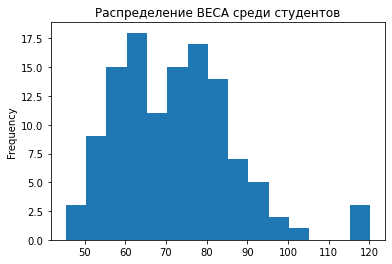

In [14]:
#Гистограмма "РАСПРЕДЕЛЕНИЕ ВЕСА СРЕДИ СТУДЕНТОВ"
students_food_2['weight'].plot(kind='hist',title='Распределение ВЕСА среди студентов', bins=15)


<AxesSubplot:title={'center':'Распределение ВКУСОВЫХ ПРЕДПОЧТЕНИЙ среди студентов'}, ylabel='Frequency'>

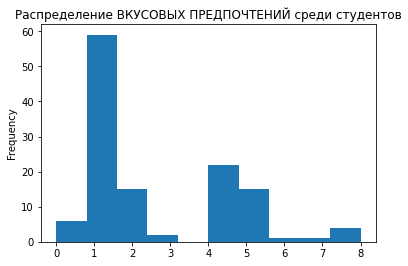

In [15]:
#Гистограмма "РАСПРЕДЕЛЕНИЕ ВКУСОВЫХ ПРЕДПОЧТЕНИЙ СТУДЕНТОВ ПО КУХНЕ
# Основные показатели: 0-none, 1 – Italian/French/greek, 2 – Spanish/mexican, 3 – Arabic/Turkish, 4 – asian/chineses/thai/nepal, 5 – American, 6 – African, 7 – Jamaican, 8 – indian
students_food_2['fav_cuisine_coded'].plot(kind='hist',title='Распределение ВКУСОВЫХ ПРЕДПОЧТЕНИЙ среди студентов')
# Благодаря данной визуализации мы смело можем утверждать, что большая часть опрошенных студентов предпочитает Итальянскую, Французскую или Греческую кухню.



In [16]:
students_food_2['fav_cuisine_coded'] = students_food_2['fav_cuisine_coded'].replace(0, 'Нет предпочтений')
students_food_2['fav_cuisine_coded'] = students_food_2['fav_cuisine_coded'].replace(1, 'Italian/French/Greek')
students_food_2['fav_cuisine_coded'] = students_food_2['fav_cuisine_coded'].replace(2, 'Spanish/Mexican')
students_food_2['fav_cuisine_coded'] = students_food_2['fav_cuisine_coded'].replace(3, 'Arabic/Turkish')
students_food_2['fav_cuisine_coded'] = students_food_2['fav_cuisine_coded'].replace(4, 'Asian/Chineses/Thai/Nepal')
students_food_2['fav_cuisine_coded'] = students_food_2['fav_cuisine_coded'].replace(5, 'American')
students_food_2['fav_cuisine_coded'] = students_food_2['fav_cuisine_coded'].replace(6, 'African')
students_food_2['fav_cuisine_coded'] = students_food_2['fav_cuisine_coded'].replace(7, 'Jamaican')
students_food_2['fav_cuisine_coded'] = students_food_2['fav_cuisine_coded'].replace(8, 'Indian')

students_food_2['fav_cuisine_coded'] = students_food_2['fav_cuisine_coded'].replace('nan', 'Нет ответа')

In [17]:
# количество студентов в разрезе предпочтений в еде
students_by_food_preferences = students_food_2[['Students','fav_cuisine_coded']].groupby('fav_cuisine_coded').count()
students_by_food_preferences

,Students
fav_cuisine_coded,
African,1
American,15
Arabic/Turkish,2
Asian/Chineses/Thai/Nepal,22
Indian,4
Italian/French/Greek,59
Jamaican,1
Spanish/Mexican,15
Нет предпочтений,6


<AxesSubplot:title={'center':'Предпочтения в еде среди студентов (по возрастанию)'}, ylabel='Вкусовые предпочтения'>

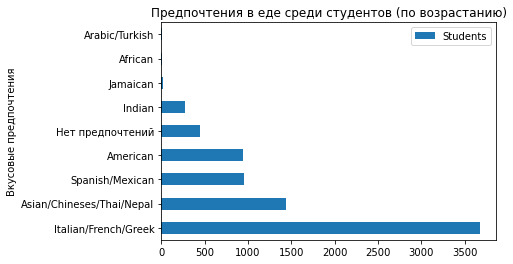

In [18]:
# Распределение студентов по вкусовым предпочтениям (0-none, 1 – Italian/French/greek, 2 – Spanish/mexican, 3 – Arabic/Turkish, 4 – asian/chineses/thai/nepal, 5 – American, 6 – African, 7 – Jamaican, 8 – indian)
top8_preferences = students_food_2[['Students','fav_cuisine_coded']].groupby('fav_cuisine_coded').sum().sort_values('Students', ascending=False).head(9)
top8_preferences.plot(kind='barh', title='Предпочтения в еде среди студентов (по возрастанию)',ylabel='Студенты', xlabel='Вкусовые предпочтения')


In [19]:
# Gender (Мужчины & женщины)
students_food_2['Gender'] = students_food_2['Gender'].replace(1, 'Женщины')
students_food_2['Gender'] = students_food_2['Gender'].replace(2, 'Мужчины')

<AxesSubplot:title={'center':'Распределение студентов по ГЕНДЕРНОМУ признаку'}, ylabel='Gender'>

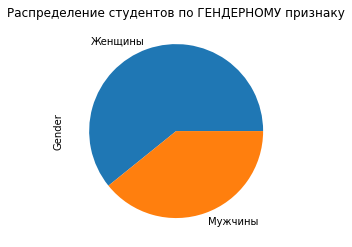

In [20]:
# Построим ВСЕМИ НЕЛЮБИМУЮ КРУГОВУЮ ДИАГРАММУ, чтобы определить, студентов какого пола участовало в опросе больше.
# Можем сделать вывод, что студентов женского пола участвовало больше
students_gender = students_food_2['Gender'].value_counts()
students_gender.plot(kind='pie', title='Распределение студентов по ГЕНДЕРНОМУ признаку')

In [21]:
students_food_2['cook'] = students_food_2['cook'].replace(1, 'Каждый день')
students_food_2['cook'] = students_food_2['cook'].replace(2, 'Пару дней в неделю')
students_food_2['cook'] = students_food_2['cook'].replace(3, 'Иногда, не часто')
students_food_2['cook'] = students_food_2['cook'].replace(4, 'Иногда помогаю')
students_food_2['cook'] = students_food_2['cook'].replace(5, 'Никогда')
students_food_2['cook'] = students_food_2['cook'].replace('nan', 'Нет ответа')


In [22]:
#Влияло ли как-то семейное положение на то, как чаасто студенты готовят дома



In [23]:
status_by_cook = students_food_2[['Students', 'cook']].groupby('cook').count()
status_by_cook

,Students
cook,
Иногда помогаю,18
"Иногда, не часто",49
Каждый день,13
Никогда,8
Пару дней в неделю,34


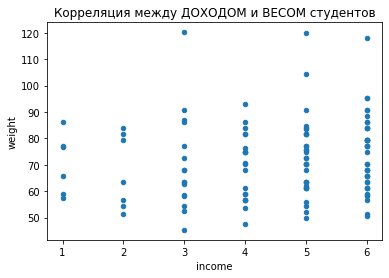

In [24]:
# посмотрим на взаимосвязь доходов с весом студентов
students_food_2.plot(kind='scatter', 
        x='income', 
        y='weight', 
        title='Корреляция между ДОХОДОМ и ВЕСОМ студентов')
plt.show()

#Примечательно, что студентов с очень большим весом нет среди тех, кто зарабатывает менее 30,000 $ в год.

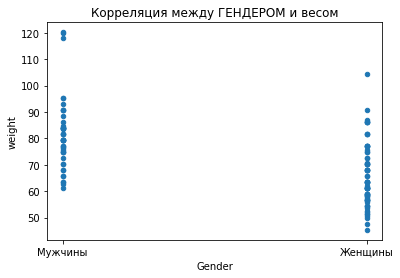

In [25]:
#Проверим, зависит ли вес от пола стдентов
students_food_2.plot(kind='scatter', 
        x='Gender', 
        y='weight', 
        title='Корреляция между ГЕНДЕРОМ и весом')
plt.show()
# Логично, что среди нашей выборки большим весом обаладают представители мужской части студентов, а наименьшим  - женской части.

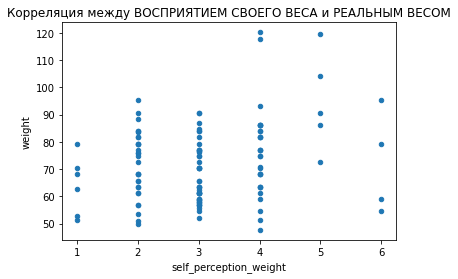

In [26]:
#Проверим, насколько адекватно студенты воспринимают свой вес:
students_food_2.plot(kind='scatter', 
        x='self_perception_weight', 
        y='weight', 
        title='Корреляция между ВОСПРИЯТИЕМ СВОЕГО ВЕСА и РЕАЛЬНЫМ ВЕСОМ')
plt.show()


# Расшифровка ответов:
#6 Не рассматривают себя в категории веса
#5 Толстые
#4 Слегка полные
#3 В правильном весе
#2 Стройные
#1 Худые

# Интересен тот факт, что не все студенты адекватно оценивали свой вес:
# Например, объективно упитанные студенты (свыше 100 кг) указали, что чувствуют себя слегка полными
# Некоторые студенты, весившие свыше 90 кг ответили, что считают себя стройными 
# Есть среди опрашиваемых такие студенты, которые при весе около 50 кг указали, что относятся к слегка полным.

# Могу сделать небольшой вывод: У стедентов есть склонность преувеличивать или преуменьшать категорию своего веса.
# НЕОБХОДИМО ТАКЖЕ ПОМНИТЬ, ЧТО У НАС НЕТ ДАННЫХ О РОСТЕ СТУДЕНТОВ, ЧТО МОЖЕТ СУЩЕСТВЕННО СКАЗЫВАТЬСЯ НА АНЛИЗЕ ДАННЫХ.

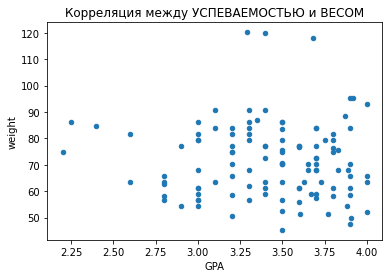

In [27]:
# Проверим есть ли взаимосвязь между Успеваемостью и весом студентов:
students_food_2.plot(kind='scatter', 
        x='GPA', 
        y='weight', 
        title='Корреляция между УСПЕВАЕМОСТЬЮ и ВЕСОМ')
plt.show()
# Отмечу, что не нашла никакой явной связи между успеваемостью и весом студентов.

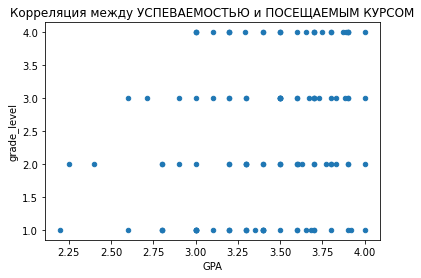

In [28]:
# Проверим есть ли взаимосвязь между Успеваемостью и курсом, который посещают студенты:
students_food_2.plot(kind='scatter', 
        x='GPA', 
        y='grade_level', 
        title='Корреляция между УСПЕВАЕМОСТЬЮ и ПОСЕЩАЕМЫМ КУРСОМ')
plt.show()
# Я нашла небольшую, но все же связь мужду успеваемостью и курсом, который посещает студент: 
# Чем старше курс, тем  меньше студентов с низких показателем GPA

<AxesSubplot:title={'center':'Распределение оценок студентов'}>

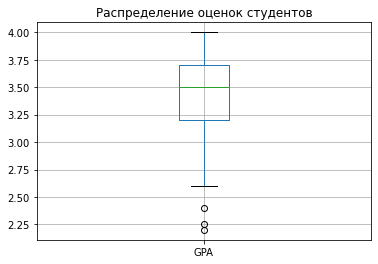

In [29]:
# Рассмотрим растпределение балла студентов с помощью боксплота
students_food_2['GPA'].plot(kind='box',
                   title='Распределение оценок студентов', grid=True)
# Мы можем наблюдать выбросы в низких показателях оценок. 

<AxesSubplot:title={'center':'Распределение веса студентов'}>

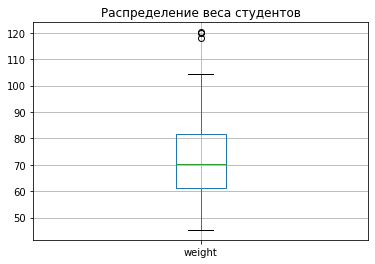

In [30]:
# Рассмотрим растпределение веса студентов с помощью боксплота
students_food_2['weight'].plot(kind='box',
                   title='Распределение веса студентов', grid=True)
# Мы можем наблюдать выбросы в сторону увеличения. Ничего удивительного, это же американские студенты :-) 